In [7]:
from torch.utils.cpp_extension import load
import time
bench_l2 = load(name="bench_l2", sources=["l2.cpp", "l2_partitions.cu"], extra_cuda_cflags=["-arch=sm_89", "--keep", "--keep-dir", "/workspace/benchmark/temp"], verbose=True)
print(bench_l2)
global_results, local_results = bench_l2.bench(0, 128, 128, 10)

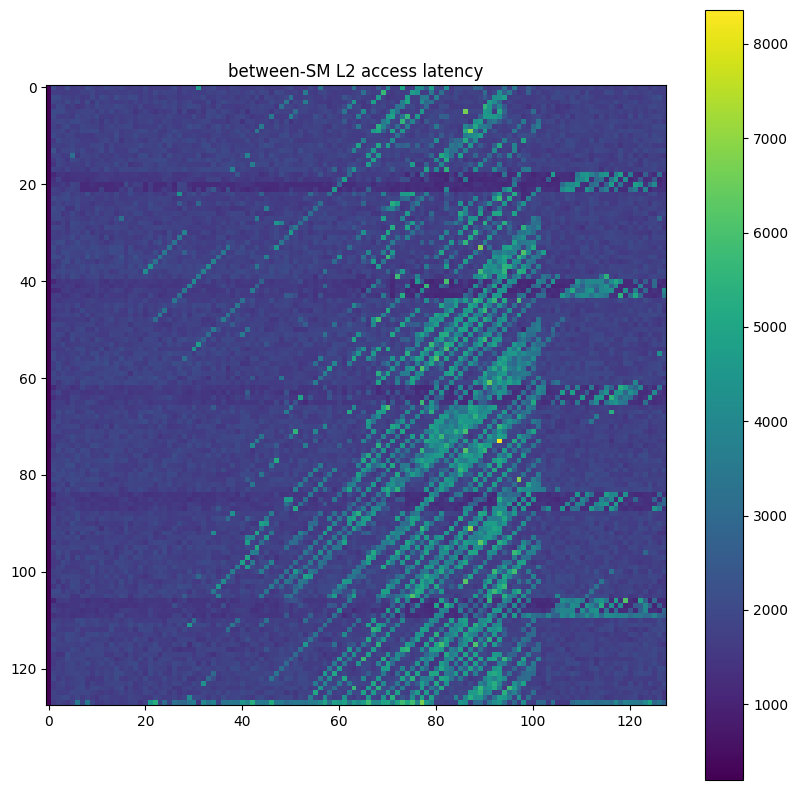

In [6]:
import matplotlib.pyplot as plt
import torch

summed_results = local_results.to(torch.int64).sum(axis=3).sum(axis=0) # sum b/w iterations and warps

for i in range(local_results.shape[0]):
    # Create the heatmap
    plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
    plt.imshow(local_results[i].to(torch.int64).sum(axis=3).numpy(), cmap='viridis')  # Choose a colormap that fits your preference
    plt.colorbar()  # Adds a colorbar to the side
    plt.title('between-SM L2 access latency')
    plt.show()

In [ ]:
summed_results[0]


tensor([ 192, 1268, 1200, 1196, 1220, 1224, 1284, 1288, 1216, 1216, 1288, 1288,
        1236, 1244, 1200, 1204, 1236, 1248, 1196, 1200, 1176, 1180, 1240, 1244,
        1172, 1172, 1240, 1244, 1204, 1212, 1224, 1224, 1204, 1204, 1240, 1232,
        1288, 1288, 1256, 1256, 1288, 1288, 1256, 1264, 1208, 1208, 1216, 1216,
        1204, 1204, 1216, 1220, 1212, 1216, 1192, 1192, 1212, 1212, 1188, 1188,
        1164, 1160, 1180, 1176, 1168, 1168, 1188, 1180, 1252, 1252, 1168, 1164,
        1252, 1252, 1164, 1176, 1232, 1228, 1264, 1272, 1240, 1236, 1268, 1264,
        1288, 1292, 1252, 1264, 1292, 1296, 1260, 1256, 1208, 1208, 1240, 1240,
        1208, 1208, 1244, 1252, 1184, 1180, 1240, 1240, 1176, 1176, 1244, 1244,
        1236, 1232, 1268, 1268, 1236, 1232, 1268, 1260, 1224, 1224, 1252, 1252,
        1224, 1232, 1252, 1248, 1272, 1276, 1260, 1260])

In [ ]:
summed_results[:, 1]

tensor([1268, 1172, 1140, 1140, 1124, 1148, 1148, 1112, 1188, 1168, 1260, 1180,
        1228, 1268, 1236, 1160, 1140, 1156, 1164, 1124, 1200, 1244, 1200, 1108,
        1068, 1132, 1096, 1036, 1076, 1076, 1160, 1116, 1188, 1184, 1156, 1144,
        1112, 1112, 1072, 1044, 1104, 1080, 1132, 1036, 1116, 1104, 1080, 1040,
        1012, 1000, 1004,  972, 1048, 1052, 1128, 1064, 1092, 1084, 1060, 1012,
         972,  936, 1080, 1068, 1160, 1088, 1180, 1224, 1200, 1092, 1056, 1112,
        1124, 1048, 1140, 1168, 1252, 1204, 1180, 1164, 1152, 1100, 1076, 1080,
        1136, 1124, 1180, 1156, 1244, 1176, 1148, 1092, 1064, 1052, 1056, 1024,
        1088, 1080, 1148, 1124, 1216, 1220, 1188, 1136, 1116, 1124, 1172, 1100,
        1164, 1220, 1168, 1120, 1088, 1104, 1068, 1012, 1052, 1008, 1068, 1084,
        1152, 1096, 1152, 1160, 1128, 1148, 1128, 1064])

In [27]:
(local_results.sum(axis=3) == 192).sum()

tensor(128)